# Project 3
***

## Part 1: Regression analysis of Gapminder data

In [66]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('gap.tsv', sep='\t')
data.sort_values('year', inplace=True)
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
528,France,Europe,1952,67.410,42459667,7029.809327
540,Gabon,Africa,1952,37.003,420702,4293.476475
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
552,Gambia,Africa,1952,30.000,284320,485.230659


### Exercise 1: Make a scatter plot of life expectancy across time.

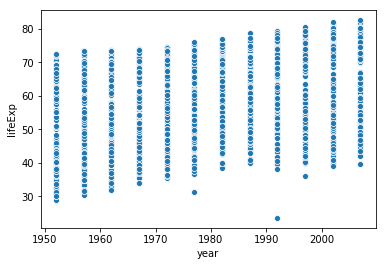

In [67]:
sns.scatterplot(x=data['year'], y=data['lifeExp'])

### Question 1: Is there a general trend for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)
There seems to be a positive linear trend in the data.

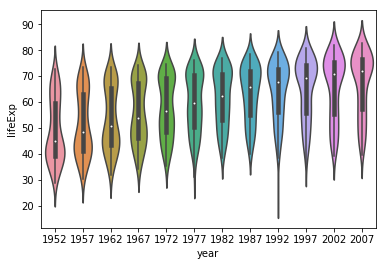

In [68]:
sns.violinplot(x=data['year'], y=data['lifeExp'])

### Question 2: How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?
The life expectancy distribution per year is bimodal and asymmetrical, and it starts off positively skewed during the earlier years but progressively becomes negatively skewed.

### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)
Viewing the graph qualitatively, I would reject the null hypothesis, as there is an obvious positive trend in the medians of the distributions.

### Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)
The distributions of the violins in the residual plot would be graphed based on the distance of the data points in the original plot from the regression line, centered around the 0th y-coordinate.

### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like?
The regression line would run positively to fit the medians of the violin plots.

### Exercise 2: Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable).

In [77]:
X = np.array([[year] for year in data['year']])
y = data['lifeExp']
regression = linear_model.LinearRegression()
regression = regression.fit(X, y)
regression.coef_[0]

0.32590382763715148

### Question 6: On average, by how much does life expectancy increase every year around the world?
On average, the global life expectancy increases by .326 years per year.

In [78]:
# R^2 score
regression.score(X, y)

0.18975713852188814

### Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?



### FINISH THIS QUESTION ^^^^^^

### Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2.

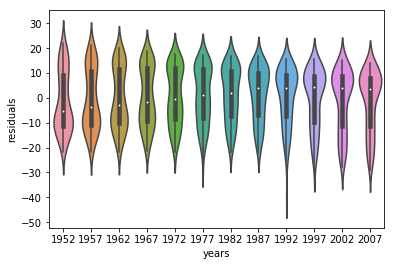

In [79]:
def plot_residuals():
    residuals = []
    years = []

    for index, row in data.iterrows():
        residuals.append(row['lifeExp'] - regression.predict([[row['year']]]))
        years.append(row['year'])

    years = np.array(years)
    residuals = np.array(residuals).flatten()
    residuals_df = pd.DataFrame({'years': years, 'residuals': residuals})

    sns.violinplot(x=residuals_df['years'], y=residuals_df['residuals'])

plot_residuals()


### Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?
The plot does match my expectations, as all of the violins are distributed to extend above and below the 0 y-axis coordinate.

### Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent.

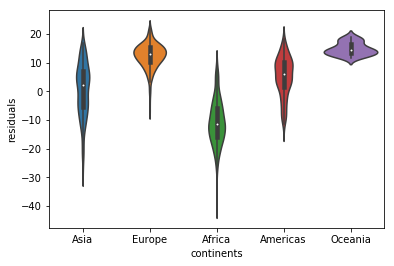

In [72]:
continents = []

for index, row in data.iterrows():
    continents.append(row['continent'])

continents = np.array(continents)
residuals_vs_continents = pd.DataFrame({'continents': continents, 'residuals': residuals})
sns.violinplot(x=residuals_vs_continents['continents'], y=residuals_vs_continents['residuals'])

### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?
It seems that there is a dependence between model residual and continent, as the continents with more first-world countries (i.e. Europe, the Americas, and Oceania) have higher residuals than the continents with more third-world countries (i.e. Asia and the Africa continents). This suggests that a regression analysis across time is not very representative of the trend that individual continents are observing.

### Exercise 5: As in the Moneyball project, make a scatter plot of life expectancy vs. year, grouped by continent, and add a regression line.

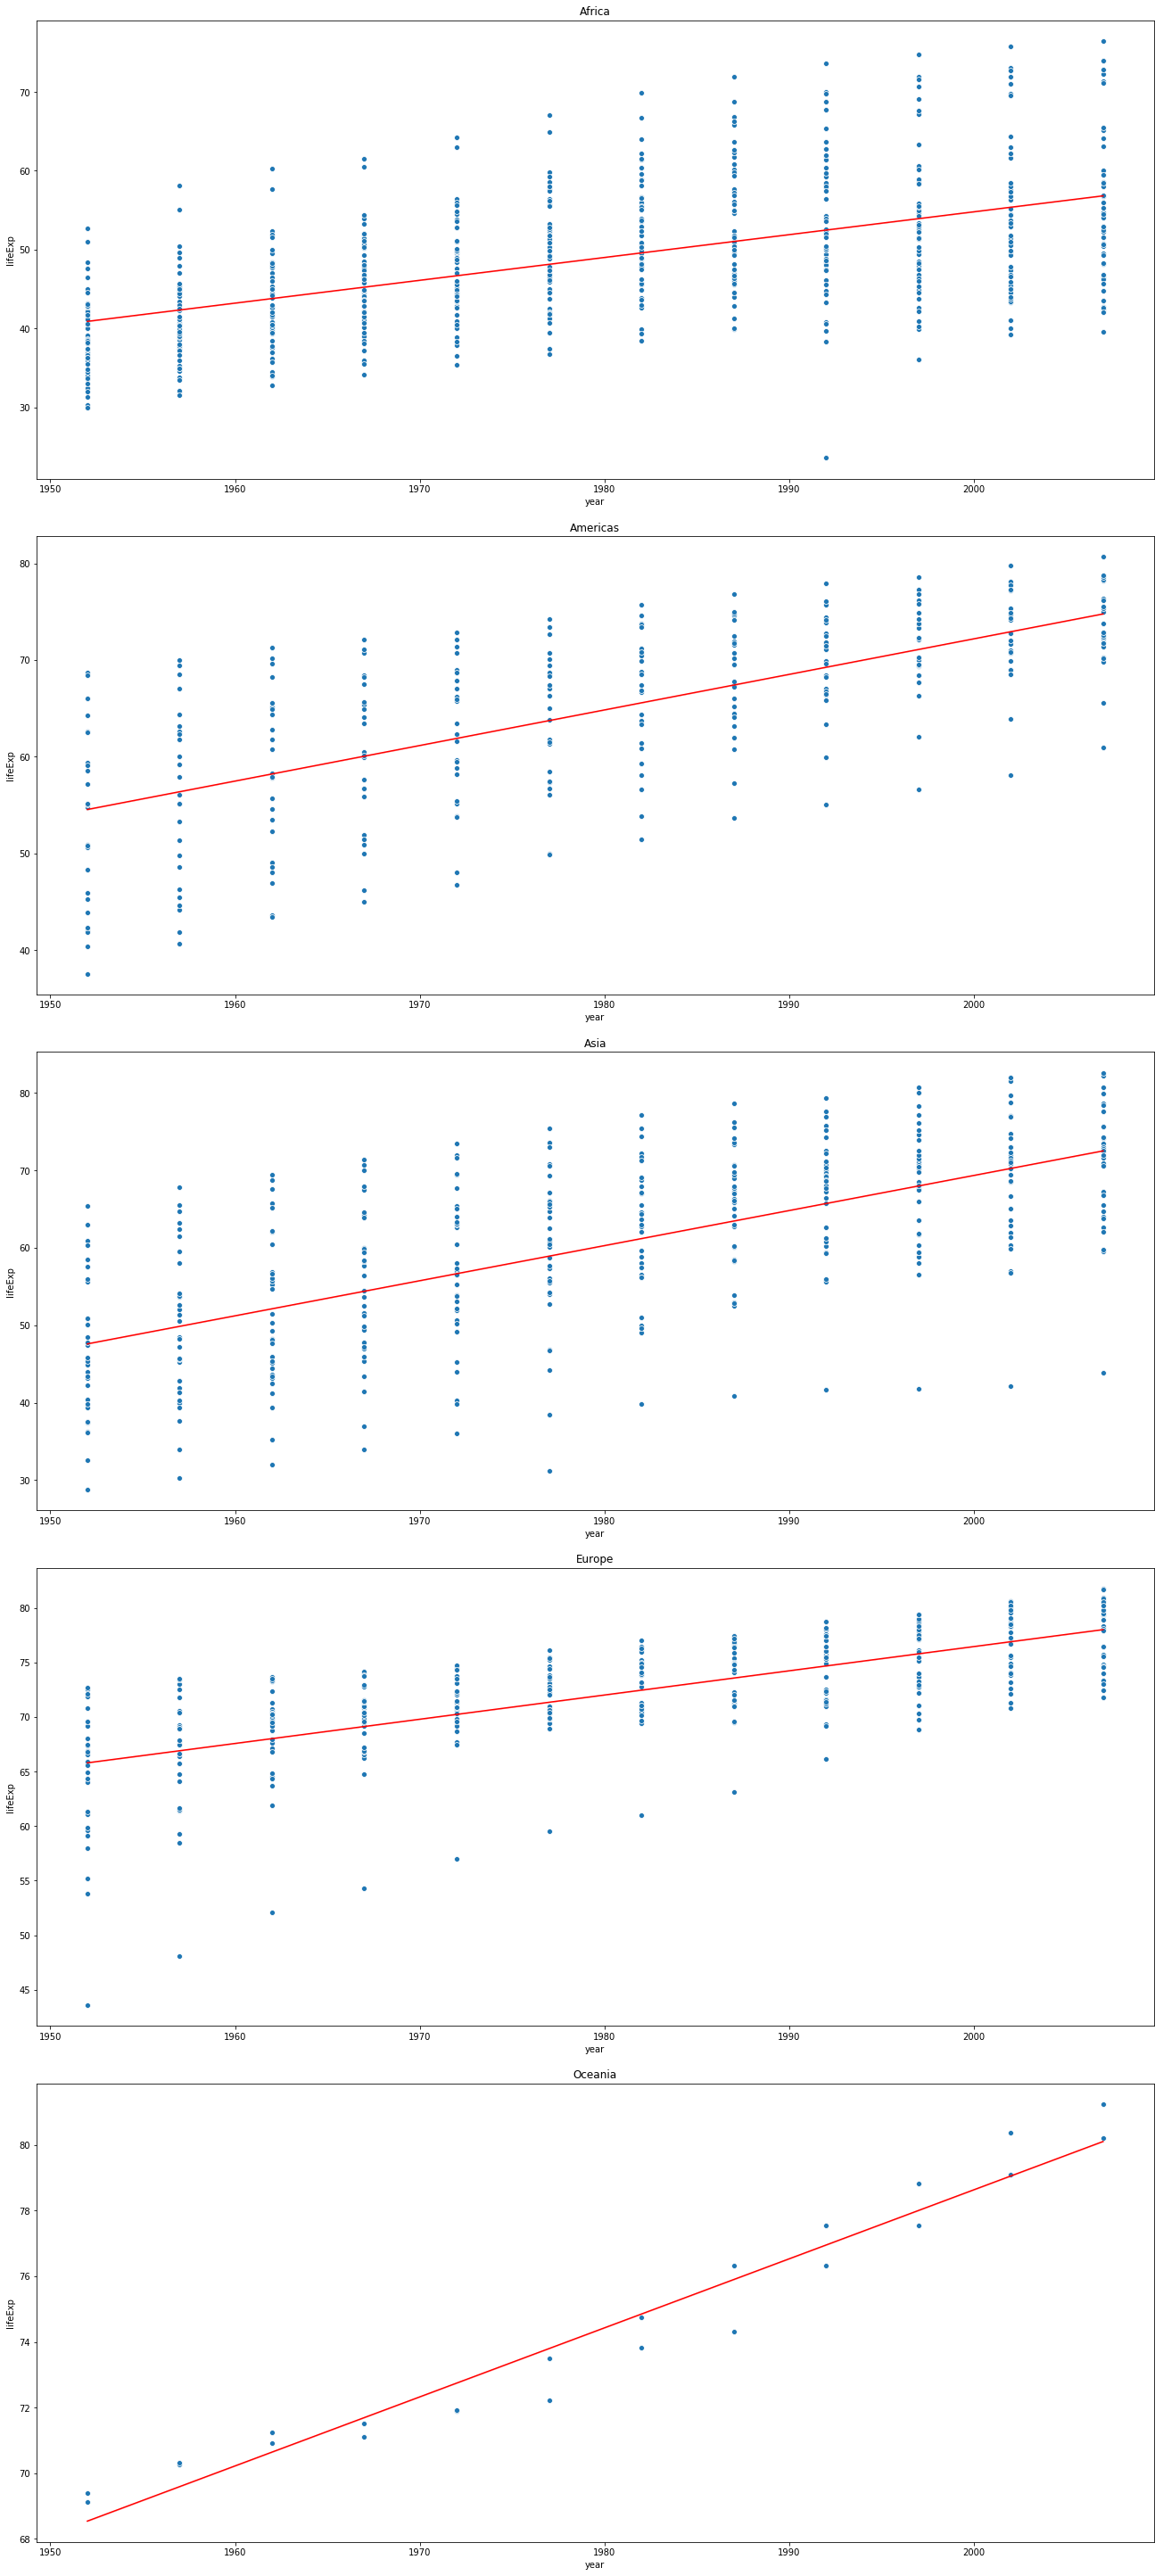

In [73]:
fig, axs = plt.subplots(nrows=5, figsize=(18, 40), constrained_layout=True)
ax_idx = 0

continent_graphs = []

africa = data.loc[data['continent'] == 'Africa']
americas = data.loc[data['continent'] == 'Americas']
asia = data.loc[data['continent'] == 'Asia']
europe = data.loc[data['continent'] == 'Europe']
oceania = data.loc[data['continent'] == 'Oceania']

continent_graphs.extend([africa, americas, asia, europe, oceania])

for continent_graph in continent_graphs:
    X = np.array([[year] for year in continent_graph['year']])
    y = continent_graph['lifeExp']
    regression = linear_model.LinearRegression()
    regression = regression.fit(X, y)
    
    ax = sns.scatterplot(x=continent_graph['year'], y=continent_graph['lifeExp'], ax=axs[ax_idx])
    sns.lineplot(x=X.flatten(), y=regression.predict(X), ax=ax, color='r')
    
    ax.set_title(continent_graph['continent'].iloc[0])
    
    ax_idx += 1

### Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?

# FINISH THIS QUESTION ^^^

### Exercise 6: Fit a linear regression model for life expectancy including a term for an interaction between continent and year.

In [74]:
# Convert discrete Continent variable to continuous variable (One hot encoding)
data_copy = data.copy(deep=True)
data_copy['interaction'] = np.nan

for index, row in data_copy.iterrows():
    if row['continent'] == 'Africa':
        data_copy.at[index, 'continent'] = 1
        continue
    if row['continent'] == 'Americas':
        data_copy.at[index, 'continent'] = 2
        continue
    if row['continent'] == 'Asia':
        data_copy.at[index, 'continent'] = 3
        continue
    if row['continent'] == 'Europe':
        data_copy.at[index, 'continent'] = 4
        continue
    if row['continent'] == 'Oceania':
        data_copy.at[index, 'continent'] = 5
        continue

# Fill interaction term column
data_copy['interaction'] = data_copy['continent'] * data_copy['year']

data_copy.head()

,country,continent,year,lifeExp,pop,gdpPercap,interaction
0,Afghanistan,3,1952,28.801,8425333,779.445314,5856
528,France,4,1952,67.410,42459667,7029.809327,7808
540,Gabon,1,1952,37.003,420702,4293.476475,1952
1656,West Bank and Gaza,3,1952,43.160,1030585,1515.592329,5856
552,Gambia,1,1952,30.000,284320,485.230659,1952


In [76]:
# Fit linear model
X = data_copy.as_matrix(columns=['year', 'continent', 'interaction'])
y = data_copy['lifeExp']
regression_resid = linear_model.LinearRegression()
regression_resid = regression_resid.fit(X, y)
regression_resid.coef_

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([  3.35369631e-01,   1.48163304e+01,  -4.06085828e-03])

### Question 11: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?
The first parameter (year) and the second parameter (continent) are significantly different from 0
## Might be wrong ^^^^

### Exercise 8: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.

In [ ]:
def plot_interaction_residuals():
    residuals = []
    years = []

    for index, row in data_copy.iterrows():
        residuals.append(row['lifeExp'] - regression_resid.predict([[row['year']]]))
        years.append(row['year'])

    years = np.array(years)
    residuals = np.array(residuals).flatten()
    residuals_df = pd.DataFrame({'years': years, 'residuals': residuals})

    sns.violinplot(x=residuals_df['years'], y=residuals_df['residuals'])

# ^^^^ MUST FINISH THIS FIRST SECTION ^^^^

## Part 2: Classification

### Gradient Descent

### Problem 1
Implement the gradient descent algorithm (either batch or stochastic versions) for multiple linear regression. I.e., extend the version of the algorithm in the lecture notes to multiple parameters.

In [11]:
# Batch gradient descent
def gradient_descent(X, y, num_steps, alpha):
    m, n = X.shape
    theta = np.zeros(n)
    f = np.zeros(num_steps)
    
    for i in range(num_steps):
        f[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2
        
        g = X.T.dot(X.dot(theta) - y)
        theta -= alpha * g
    
#     for step in range(num_steps):
#         # sum over all observations
#         for j in range(n):
#             g = 0
#             for i in range(m):
#                 g += (X[i].dot(theta) - y[i]) * X[i, j]
                
#             theta[j] -= alpha * g / m
    return theta, f

### Problem 2 Derive the above update equation. Write the derivation in a markdown ipynb cell.
# INCOMPLETE

### Problem 3 Implement the gradient descent algorithm (either batch or stochastic versions) for multiple logistic regression. I.e., modify your code in problem 1 for the logistic regression update equation.

In [12]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

# Batch gradient descent
def logr_gradient_descent(X, y, num_steps, alpha, add_intercept=False):
    m, n = X.shape
    theta = np.zeros(n)
    #f = np.zeros(num_steps)
    
    for i in range(num_steps):
        #f[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2
        f = X.dot(theta)
        p = sigmoid(f)
        g = X.T.dot(y - p)
        theta += alpha * g
            
    return theta

In [13]:
def make_line(coefs):
    x_vals = []
    y_vals = []
    for x in range(-3, 4):
        y = coefs[0]
        for coef in coefs[1:]:
            y += x * coef
            
        x_vals.append(x)
        y_vals.append(y)
        
    return x_vals, y_vals

[  2.02977994e+03  -2.60406540e+02  -3.17630667e+02   5.64632127e+02
   1.89034693e+00   1.56697481e+02  -1.09969716e+03   5.38459398e+01
  -9.82577290e+02  -1.93691909e+02  -1.26647192e+02  -5.90956617e+02
  -2.16462099e+02  -6.91410587e+02  -2.97644423e+02  -5.20873898e+02
   1.72621475e+01   6.55831844e+02  -2.07105942e+02  -6.19481909e+02]


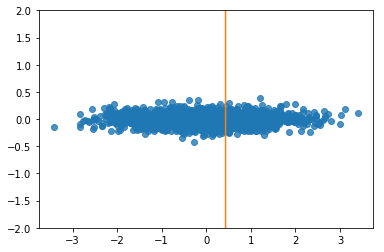

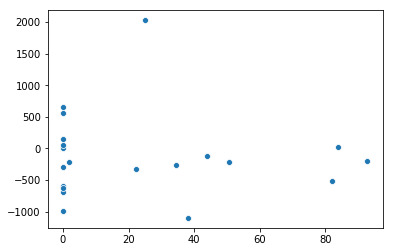

In [14]:
#simulate data for linear regression

gen_data_x, gen_data_y, gen_data_coef = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5,
                                                                         coef=True)

#a really bad estimator
#returns random vector as estimated parameters
dummy = np.ndarray([100, 20])
for index, row in enumerate(dummy):
    dummy[index] = np.random.normal(0, .1, 20)
    
sns.regplot(x=gen_data_x, y=dummy, fit_reg=False)

theta, f = gradient_descent(gen_data_x, gen_data_y, 50, .01)
print(theta)
x_vals, y_vals = make_line(theta)
plt.ylim((-2, 2))
plt.plot(x_vals, y_vals)
plt.show()

sns.scatterplot(x=gen_data_coef, y=theta)

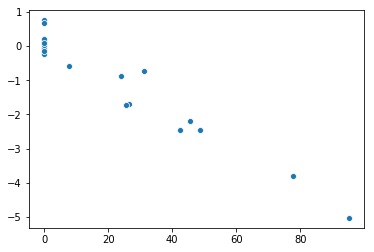

In [15]:
#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y, log_gen_data_coef = sklearn.datasets.make_regression(n_samples=100, n_features=20, 
                                                                             noise = 1.5, coef=True)
log_gen_data_y = np.array([0 if i>0 else 1 for i in dump_y])
#a really bad estimator
#returns random vector as estimated parameters
dummy = np.ndarray([100, 20])
for index, row in enumerate(dummy):
    dummy[index] = np.random.normal(0, .1, 20)
# sns.regplot(x=log_gen_data_x, y=dummy, fit_reg=False)

theta = logr_gradient_descent(log_gen_data_x, log_gen_data_y, 300000, .00001)
# x_vals, y_vals = make_line(theta)
# plt.ylim((-2, 2))
# plt.plot(x_vals, y_vals)
# plt.show()

sns.scatterplot(x=log_gen_data_coef, y=theta)

## Try it out!

In [53]:
import requests
import io

# UCI Iris Dataset (http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
data = requests.get(url=url).content
wine_df = pd.read_csv(io.StringIO(data.decode('utf-8')), header=None, names=['class', 'alcohol', 'malic_acid', 'ash',
                                                                             'alcalinity_of_ash', 'magnesium', 
                                                                             'total_phenols', 'flavanoids',
                                                                             'nonflavanoid_phenols', 'proanthocyanins',
                                                                             'color_intensity', 'hue', 
                                                                             'od280/od315_of_diluted_wines', 
                                                                             'proline'])
wine_df = wine_df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 
                   'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 
                   'od280/od315_of_diluted_wines', 'proline', 'class']]
wine_df = wine_df.loc[wine_df['class'] != 3]
X = wine_df.loc[:, :'proline']
y = wine_df['class']
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [54]:
# Use RandomizedSearchCV to narrow down the possible most optimal parameters for GridSearchCV
# rfc = RandomForestClassifier()
# n_estimators = [n for n in range(100, 1000, 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [n for n in range(10, 100, 10)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

# params = {'n_estimators': n_estimators,
#           'max_features': max_features,
#           'max_depth': max_depth,
#           'min_samples_split': min_samples_split,
#           'min_samples_leaf': min_samples_leaf,
#           'bootstrap': bootstrap}

# rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=params, n_iter=100, cv=10, verbose=2, n_jobs=-1)
# rfc_random.fit(X, y)
# rfc_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] n_estimators=810, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV] n_estimators=810, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV] n_estimators=810, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV] n_estimators=810, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.1s
[CV] n_estimators=810, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=False, total=   1.1s
[CV] n_estimators=810, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=

[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.3s
[CV] n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.2s
[CV] n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s


[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.3s
[CV] n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.4s
[CV] n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=750, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=750, min_samp

[CV]  n_estimators=770, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.2s
[CV]  n_estimators=770, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.2s
[CV] n_estimators=270, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV] n_estimators=270, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=270, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=270, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=270, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=270, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators

[CV]  n_estimators=330, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.7s
[CV]  n_estimators=330, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.7s
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=330, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.7s
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=330, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.6s
[CV] n_estimators=330, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=330, min_

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   1.4s
[CV] n_estimators=920, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   1.4s
[CV] n_estimators=920, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=920, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=True, total=   1.2s
[CV] n_estimators=920, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=920, min_samp

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   48.5s


[CV] n_estimators=170, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=170, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.5s
[CV] n_estimators=170, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=170, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.4s
[CV] n_estimators=750, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=170, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.4s
[CV] n_estimators=750, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=170, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=False, total=   0.4s
[CV] n_estimators=750, m

[CV] n_estimators=220, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=220, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.5s
[CV] n_estimators=220, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=220, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.6s
[CV] n_estimators=220, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=220, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.6s
[CV] n_estimators=220, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=710, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   1.8s
[CV] n_estimators=220, min_sa

[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=610, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=430, min_

[CV] n_estimators=110, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.9s
[CV] n_estimators=110, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.9s
[CV] n_estimators=110, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.9s
[CV] n_estimators=110, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False 
[CV]  n_estimators=110, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   0.2s
[CV] n_estimators=110, 

[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=880, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=   1.7s
[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=880, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=   1.6s
[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=880, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=   1.6s
[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=880, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=   1.7s
[CV] n_estimators=880, min_samples_s

[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   0.2s
[CV] n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   0.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   0.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.8s
[CV] n_estimators=700, min_samp

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min


[CV]  n_estimators=240, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=240, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.7s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=240, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.7s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   1.8s
[CV] n_estimators=780, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=780, mi

[CV] n_estimators=440, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=870, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=False, total=   2.0s
[CV] n_estimators=440, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=440, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.1s
[CV] n_estimators=440, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=440, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.0s
[CV] n_estimators=440, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=440, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.0s
[CV] n_estimators=44

[CV] n_estimators=660, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=660, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.5s
[CV] n_estimators=660, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=660, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=660, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.2s
[CV] n_estimators=500, min_s

[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=810, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   2.2s
[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=180, min_sampl

[CV] n_estimators=370, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=370, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.0s
[CV] n_estimators=370, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=370, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.9s
[CV] n_estimators=370, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=370, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.9s
[CV] n_estimators=370, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=370, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.9s
[CV] n_estimators=160, min_s

[CV] n_estimators=380, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=940, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=   2.4s
[CV] n_estimators=380, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=380, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.9s
[CV] n_estimators=380, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=380, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.9s
[CV] n_estimators=380, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=940, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=True, total=   2.4s
[CV] n_estimators=380, min_sam

[CV]  n_estimators=960, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.4s
[CV] n_estimators=960, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV] n_estimators=960, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=960, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.4s
[CV] n_estimators=960, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=960, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.5s
[CV] n_estimators=960, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=960, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=False, total=   2.2s
[CV] n_estimators=960, min_s

[CV] n_estimators=960, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=960, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   2.5s
[CV] n_estimators=960, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=960, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   2.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=960, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   2.4s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=960, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   2.2s
[CV] n_estimators=800, min

[CV] n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total=   0.4s
[CV] n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   0.4s
[CV] n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   0.5s
[CV] n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=130, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=False, total=   0.4s
[CV] n_estimators=130, min

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.8min


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=400, min_

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.7s
[CV] n_estimators=390, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.5s
[CV] n_estimators=390, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=700, min_sa

[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   2.1s
[CV] n_estimators=870, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=810, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   2.2s
[CV] n_estimators=870, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=870, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True, total=   2.2s
[CV] n_estimators=870, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=870, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True, total=   2.2s
[CV] n_estimators=870, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=870, min_

[CV]  n_estimators=240, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.8s
[CV] n_estimators=240, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=240, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.9s
[CV] n_estimators=240, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=920, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False, total=   3.0s
[CV] n_estimators=240, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=920, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False, total=   3.2s
[CV] n_estimators=240, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=240, min_

[CV]  n_estimators=610, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.4s
[CV] n_estimators=240, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=610, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.3s
[CV] n_estimators=240, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=240, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.0s
[CV] n_estimators=240, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=240, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.9s
[CV] n_estimators=240, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=610, min_sa

[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   2.2s
[CV] n_estimators=860, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=860, min_samples_

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.7s
[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.7s
[CV] n_estimators=880, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=800, 

[CV]  n_estimators=910, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   4.0s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=   3.6s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False, total=   3.5s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=910, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   4.6s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=False 
[CV]  n_estimators=700, min_

[CV]  n_estimators=310, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   1.2s
[CV] n_estimators=310, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=310, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   1.2s
[CV] n_estimators=310, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=310, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   1.1s
[CV] n_estimators=310, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=310, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   1.1s
[CV] n_estimators=310, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=3

[CV]  n_estimators=870, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=   3.4s
[CV] n_estimators=320, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=870, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, bootstrap=True, total=   3.4s
[CV] n_estimators=320, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=320, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   1.0s
[CV] n_estimators=320, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=320, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   1.0s
[CV] n_estimators=320, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=320, min_sa

[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.8s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.8s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.8s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=   0.7s
[CV] n_estimators=230, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=230, min_samples_

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.9min finished


{'n_estimators': 680,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [56]:
# Use GridSearchCV with parameters around the range of the best parameters returned from RandomSearchCV to find the
# actual most optimal parameters

# Parameters returned from RandomSearchCV 
# {'n_estimators': 680,
#  'min_samples_split': 5,
#  'min_samples_leaf': 4,
#  'max_features': 'sqrt',
#  'max_depth': 50,
#  'bootstrap': True}

# grid = {'n_estimators': [500, 680, 800],
#         'max_features': ['sqrt', 8, 13],
#         'max_depth': [50, 60, 70],
#         'min_samples_split': [4, 5, 6],
#         'min_samples_leaf': [3, 4, 5],
#         'bootstrap': [True]}
# rfc = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rfc, param_grid=grid, cv=10, n_jobs=-1, verbose=2)
# grid_search.fit(X, y)
# grid_search.best_params_

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[

[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.4s


[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, 

[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.4s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.4s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, 

[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.5s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.5s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.4s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.4s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, 

[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   1.9s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   1.9s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.1s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.1s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min


[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.8s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.8s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, 

[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, 

[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, 

[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=680, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=680, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=680, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=680, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, 

[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   3.4s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   3.2s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   2.8s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   3.5s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samp

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min


[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=   3.1s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=   3.1s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   2.4s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   2.1s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   2.2s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680, total=   3.0s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680, total=   3.2s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.6s
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   2.1s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.1s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   2.8s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   2.7s
[CV] bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=8, min_sam

[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13,

[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   4.0s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   4.2s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   4.5s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   3.1s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=13,

[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.8s
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.7s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.2min


[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   2.4s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   2.4s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=13,

[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.2s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=13,

[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=13,

[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_le

[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   4.0s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   4.9s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   5.4s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   4.9s
[CV] bootstrap=True, max_depth=50, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=50, max_features=13,

[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.7s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.8s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.7s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.9s
[CV] bootstrap=True, max_depth=60, m

[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=60, m

[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=60, m

[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=60, m

[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   3.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   3.6s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   4.0s
[CV] bootstrap=True, max_depth=60, m

[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.1s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=60, m

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.7min


[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.9s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   2.1s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   2.0s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   2.1s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, 

[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   2.0s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.4s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, 

[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   3.0s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   3.0s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   3.1s
[CV] bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   3.5s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max

[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   2.8s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   3.8s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   4.0s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   3.8s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.2s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.4s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.4s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.3s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680, total=   3.2s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680, total=   2.8s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   3.4s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   3.4s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   2.1s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   3.5s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   4.0s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   4.6s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.7s
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.8s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.7s
[CV] bootstrap=True, max_depth=60, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.8s
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.9s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.8s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.7s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13,

[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   2.3s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   2.3s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   2.9s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   3.1s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13,

[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   4.3s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   5.0s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   4.9s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   5.2s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13,

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 14.7min


[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   2.6s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   2.7s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   2.6s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   2.7s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13,

[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   4.0s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   4.1s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   4.0s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.8s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13,

[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   3.6s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   3.4s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   4.1s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   4.1s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13,

[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   2.9s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   2.9s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   3.0s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   3.0s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13,

[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] bootstrap=True, max_depth=60, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=60, max_features=13,

[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=70, m

[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   2.8s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   2.8s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   2.9s
[CV] bootstrap=True, max_depth=70, m

[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   2.2s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=70, m

[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800, total=   2.1s
[CV] bootstrap=True, max_depth=70, m

[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   2.1s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=70, m

[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   1.9s
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=70, m

[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   1.7s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.1s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] bootstrap=True, max_depth=70, m

[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=70, m

[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=680, total=   1.8s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.6s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=   2.0s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 19.5min


[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   1.2s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=3, min_samples_split=6, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.5s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.9s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.9s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   2.0s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680, total=   2.8s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=4, min_samples_split=6, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680, total=   1.7s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   4.5s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   4.4s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=680, total=   4.2s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   5.1s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   3.2s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   3.0s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   2.7s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=70, max_features=8, min_samples_leaf=5, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=8, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=4, n_estimators=800, total=   2.4s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=5, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13,

[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   1.3s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=3, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13,

[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   2.1s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   2.4s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   2.4s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680, total=   3.2s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=4, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=13,

[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.0s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.0s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.1s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680, total=   2.2s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=5, n_estimators=680 
[CV]  bootstrap=True, max_depth=70, max_features=13,

[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=680, total=   2.3s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=680, total=   2.0s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=680, total=   2.1s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=4, min_samples_split=6, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=13,

[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   1.9s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800, total=   1.8s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=4, n_estimators=800 
[CV]  bootstrap=True, max_depth=70, max_features=13,

[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=5, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] bootstrap=True, max_depth=70, max_features=13, min_samples_leaf=5, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=70, max_features=13,

[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 24.3min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 500}

In [57]:
# Parameters returned from GridSearchCV:
# {'bootstrap': True,
#  'max_depth': 50,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 3,
#  'min_samples_split': 4,
#  'n_estimators': 500}

rfc_w_params = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_split=4, min_samples_leaf=3, 
                             max_features='sqrt', bootstrap=True, n_jobs=-1)
rfc_w_params = rfc_w_params.fit(X, y)
rfc_wo_params = RandomForestClassifier()
rfc_wo_params = rfc_wo_params.fit(X,y)

My model selection procedure was to use RandomizedSearchCV to narrow down the possible hyperparameters I would pass into GridSearchCV. I then use GridSearchCV to search for close to the most optimal hyperparameters for my RandomForestClassifier.

In [58]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

In [59]:
# Use RandomizedSearchCV to narrow down the possible most optimal parameters for GridSearchCV

# loss = ['hinge', 'squared_hinge']
# dual = [True]
# tol = [.0001, .001, .01]
# C = [0.8, 0.9, 1, 1.1, 1.2]
# max_iter = [800, 900, 1000, 1100]

# params = {'dual': dual,
#           'loss': loss,
#           'tol': tol,
#           'C': C,
#           'max_iter': max_iter}

# svc_random = RandomizedSearchCV(estimator=svc, param_distributions=params, n_iter=100, cv=10, verbose=2, n_jobs=-1)
# svc_random.fit(X, y)
# svc_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ..
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ..
[CV]  tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ..
[CV]  tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ..
[CV]  tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ..
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ..
[CV]  tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ..
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ..
[CV] tol=0.0001, max_iter=900, 

[CV]  tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=1.1 ..
[CV] tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=1 .....
[CV] tol=0.0001, max_iter=900, loss=hinge, dual=True, C=1.2 ..........
[CV]  tol=0.001, max_iter=800, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=900, loss=hinge, dual=True, C=1 ..............
[CV]  tol=0.0001, max_iter=900, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, max_iter=900, loss=hinge, dual=True, C=1.2 ..........
[CV]  tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.01, max_iter=900, loss=hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.01, max_iter=900, loss=hinge, dual=True, C=1 ..............
[CV] tol=0.01, max_it

[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9 ............
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9 ............
[CV]  tol=0.01, max_iter=900, loss=hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9 ............
[CV] tol=0.001, max_iter=1000, loss=squared_hinge, dual=True, C=0.8 ..
[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9 ............
[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9 ............
[CV] tol=0.0001, max_iter=1100, loss=hinge, dual=True, C=1.2 .........
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.9, t

[CV]  tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.001, max_iter=1100, loss=hinge, dual=True, C=1.2 ..........
[CV] tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1 ...........
[CV]  tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1 .....
[CV] tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1.1 ..
[CV]  tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1 ...........
[CV]  tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1 .....
[CV]  tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.001, max_iter=1100, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, m

[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.8, total=   0.0s
[CV]  tol=0.0001, max_iter=800, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.8 ...........
[CV] tol=0.0001, max_iter=800, loss=hinge, dual=True, C=1.2 ..........
[CV]  tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.8, total=   0.0s
[CV]  tol=0.001, max_iter=800, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.8, total=   0.0s
[CV] tol=0.001, max_iter=800, loss=hinge, dual=True, C=1.2 ...........
[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.8 ...........
[CV]  tol=0.0001, max_iter=800, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV]  tol=0.001, max_iter=800, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.8 ...........
[CV] tol=0.0001, max_iter=800, loss=hinge, dual=True, C=1.2 ..........
[CV]  tol=0.01, max_iter=1000, loss=hinge, dual

[CV] tol=0.001, max_iter=1100, loss=hinge, dual=True, C=1 ............
[CV] tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=0.9 ...
[CV]  tol=0.01, max_iter=800, loss=squared_hinge, dual=True, C=0.8, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.001, max_iter=1100, loss=hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=0.9 ...
[CV] tol=0.01, max_iter=800, loss=squared_hinge, dual=True, C=0.8 ....
[CV] tol=0.001, max_iter=900, loss=hinge, dual=True, C=1.1 ...........
[CV] tol=0.001, max_iter=1100, loss=hinge, dual=True, C=1 ............
[CV]  tol=0.001, max_iter=900, loss=hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=800, loss=squared_hinge, dual=True, C=0.8, total=   0.0s
[CV]  tol=0.001, max

[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    2.4s


[CV] tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=1.2 ...
[CV]  tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV]  tol=0.001, max_iter=900, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.0001, max_iter=1100, loss=squared_hinge, dual=True, C=0.8, total=   0.0s
[CV] tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ...
[CV]  tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV]  tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ...
[CV] tol=0.001, max_iter=900, loss=hinge, dual=True, C=0.9 ...........
[CV] tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=1.2 ...
[CV] tol=0.001, max_iter=900, loss=hinge, dual=True, C=1.2 ...........
[CV]  tol=0.001, max_iter=900, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=1.2 ...
[CV]  tol=0.001, ma

[CV]  tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=900, loss=hinge, dual=True, C=0.9 ............
[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=1.1 ...........
[CV] tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=0.9 ...
[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV]  tol=0.01, max_iter=900, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=1100, loss=hinge, dual=True, C=1.2 ...........
[CV]  tol=0.01, max_iter=1000, loss=hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=0.9 ...
[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=1.1 ...........
[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.001, max_iter=900, loss=squared_hinge, dual=True, C=0.9 ...
[CV] tol=0.01, max_iter=900, loss=hing

[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1.2 ...
[CV] tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=0.8 ..
[CV]  tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.01, max_iter=900, loss=hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=1.1 ....
[CV]  tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.01, max_iter=900, loss=hinge, dual=True, C=1.1 ............
[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1.2 ...
[CV]  tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=0.8, total=   0.0s
[CV] tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=0.8 ..
[CV]  tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1.2 ...
[CV]  tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.01, 

[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.2 .
[CV] tol=0.001, max_iter=1100, loss=hinge, dual=True, C=0.9 ..........
[CV]  tol=0.01, max_iter=1000, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.001, max_iter=800, loss=hinge, dual=True, C=1.1 ...........
[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=1.2 ...........
[CV]  tol=0.001, max_iter=1100, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.001, max_iter=1100, loss=hinge, dual=True, C=0.9 ..........
[CV]  tol=0.001, max_iter=800, loss=hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.2 .
[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.2 .
[CV]  tol=0.01, max_iter=1000, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=1.2 ...........
[CV]  tol=0.0001, max_iter=1000, loss=squared_

[CV]  tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.0001, max_iter=900, loss=hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1 ....
[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.001, max_iter=1000, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=1100, loss=hinge, dual=True, C=1 .............
[CV] tol=0.0001, max_iter=900, loss=hinge, dual=True, C=1 ............
[CV] tol=0.001, max_iter=1000, loss=hinge, dual=True, C=0.9 ..........
[CV]  tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.0001, max_iter=900, loss=hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.001, max_iter=1000, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.0001, max_iter=900, loss=hinge, dual=True, C=1 ............
[CV] tol=0.001, max_iter=1000, loss

[CV] tol=0.01, max_iter=800, loss=squared_hinge, dual=True, C=0.9 ....
[CV] tol=0.0001, max_iter=800, loss=hinge, dual=True, C=1.1 ..........
[CV]  tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.0001, max_iter=1100, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=0.9 ....
[CV] tol=0.0001, max_iter=1100, loss=squared_hinge, dual=True, C=0.9 .
[CV]  tol=0.0001, max_iter=800, loss=hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.0001, max_iter=800, loss=hinge, dual=True, C=1.1 ..........
[CV]  tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=0.9 ....
[CV]  tol=0.0001, max_iter=1100, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=800, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=800, loss=squared_hinge, dual=True, C=1.1 ....
[CV]  tol=0

[CV]  tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=0.8 ...
[CV] tol=0.0001, max_iter=900, loss=hinge, dual=True, C=0.9 ..........
[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=0.9 .
[CV]  tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=1.1 ...
[CV]  tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=0.8, total=   0.0s
[CV] tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=0.8 ...
[CV]  tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=0.9 .
[CV]  tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.0001, max_iter=900, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=0.8, total=   0

[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.9 ...........
[CV] tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1.2 ..
[CV]  tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=0.8, total=   0.0s
[CV] tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=1.2 ....
[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.9 ...........
[CV]  tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1.2 ..
[CV]  tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=900, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.9 ...........
[CV] tol=0.01, max_iter=1000, loss=hinge, dual=True, C=0.9 ...........
[CV] tol=0.01, max_iter=900

[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=1.1 ............
[CV]  tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=1.1 ............
[CV] tol=0.001, max_iter=800, loss=squared_hinge, dual=True, C=0.9 ...
[CV] tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=0.9 ..
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=1.1 ............
[CV] tol=0.01, max_iter=1100, loss=squared_hinge, dual=True, C=1.2 ...
[CV]  tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.001, max_iter=1100, loss=squared_hinge, dual=True, C=0.9 ..
[CV]  tol=0.001, max_

[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=0.8 ...
[CV]  tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.001, max_iter=1100, loss=hinge, dual=True, C=0.8 ..........
[CV] tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=0.9 ..
[CV]  tol=0.001, max_iter=1100, loss=hinge, dual=True, C=0.8, total=   0.0s
[CV]  tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.1 ..
[CV] tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=0.9 ..
[CV]  tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=0.8, total=   0.0s
[CV]  tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=0.8 ...
[CV]  tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=0.9 ..
[CV]  to

[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1 .
[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1 .
[CV]  tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1 .
[CV] tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1 ....
[CV]  tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1 .
[CV] tol=0.0001, max_iter=900, loss=squared_hinge, dual=True, C=0.9 ..
[CV]  tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.0001, max_iter=800, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1 .


[CV]  tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1.2 .........
[CV] tol=0.0001, max_iter=1100, loss=squared_hinge, dual=True, C=1 ...
[CV]  tol=0.001, max_iter=1000, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1.2 .........
[CV] tol=0.001, max_iter=1000, loss=squared_hinge, dual=True, C=1 ....
[CV]  tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=0.8 ............
[CV]  tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1.2, total=   0.0s
[CV]  tol=0.0001, max_iter=1100, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV]  tol=0.001, max_iter=1000, loss=squared_hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.0001, max_iter=1000, loss=hinge, dual=True, C=1.2 .........
[CV] tol=0.001, max

[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=1 ..............
[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1.1 ...
[CV]  tol=0.001, max_iter=1000, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV] tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.9 ...........
[CV] tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.9 ...........
[CV]  tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1.1, total=   0.0s
[CV]  tol=0.01, max_iter=800, loss=hinge, dual=True, C=1, total=   0.0s
[CV] tol=0.01, max_iter=1000, loss=squared_hinge, dual=True, C=1.1 ...
[CV] tol=0.01, max_iter=800, loss=hinge, dual=True, C=1 ..............
[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.9, total=   0.0s
[CV]  tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.9, total=   0.1s
[CV] tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.9 ...........
[CV] tol=0.01, max_iter=1100, loss=hinge, dual=True, C=0.9 ...........
[CV]  tol=0.01, max_iter=1000, loss=squared

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.7s finished


{'tol': 0.001, 'max_iter': 800, 'loss': 'hinge', 'dual': True, 'C': 0.8}

In [60]:
# Use GridSearchCV with parameters around the range of the best parameters returned from RandomSearchCV to find the
# actual most optimal parameters

# Parameters returned from RandomSearchCV 
# {'tol': 0.001, 
#  'max_iter': 800,
#  'loss': 'hinge', 
#  'dual': True, 
#  'C': 0.8}

# grid = {'tol': [.0005, .001, .002, .06] ,
#         'max_iter': [700, 800, 900, 1000, 1100],
#         'loss': ['hinge'],
#         'dual': [True],
#         'C': [0.7, 0.8, 0.9, 1.0, 1.1]}

# svc = LinearSVC()
# grid_search = GridSearchCV(estimator=svc, param_grid=grid, cv=10, n_jobs=-1, verbose=2)
# grid_search.fit(X, y)
# grid_search.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=700, tol=0.000

[CV]  C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.0005, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.001, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.06 ............
[CV]  C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.0005, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.0005, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.001 ...........
[CV] C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.0005 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.06 ............
[CV]  C=0.7, dual=True, loss=hinge, max_iter=800, tol=0.001, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=900

[CV] C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.06 ............
[CV] C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.002 ...........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.0005, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.002 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.0005 .........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.002, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.002, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.002 ...........
[CV] C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.002 ..........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.06, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.0005, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.0005 .........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=900, tol=0.002, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1000

[CV] C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.06 ...........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.06, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.002, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.001, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.06 ...........
[CV] C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.001 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.002 ..........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.001, total=   0.0s
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1000, tol=0.06, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.001 ..........
[CV] C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.0005 .........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.002, total=   0.0s
[CV] C=0.7, dual=True, loss=hinge, max_iter=1100, tol=0.002 ..........
[CV]  C=0.7, dual=True, loss=hinge, max_iter=1100

[CV]  C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.06, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.002, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.06 ............
[CV]  C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.06 ............
[CV] C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV] C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.001 ...........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.06, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=800, tol=0.0005 ..........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.06, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.06 ............
[CV]  C=0.8, dual=True, loss=hinge, max_iter=800, tol=0.0005, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=700, 

[CV]  C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.0005, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.001, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.001 ...........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=800, tol=0.002, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.001, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=800, tol=0.002 ...........
[CV] C=0.8, dual=True, loss=hinge, max_iter=800, tol=0.06 ............
[CV] C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.001 ...........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.0005, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=800,

[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    2.3s


[CV]  C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.06, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.001 ..........
[CV] C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.06 ............
[CV] C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.002 ..........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.002, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.06 ...........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.0005, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.001, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.001 ..........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.06, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.0005 .........
[CV] C=0.8, dual=True, loss=hinge, max_iter=900, tol=0.06 ............
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1000, tol=0.06, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1000, 

[CV]  C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.06, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.06 ...........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.002, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.0005, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.002 ..........
[CV] C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.001 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.06, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.002, total=   0.0s
[CV] C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.002 ..........
[CV] C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.06 ...........
[CV]  C=0.8, dual=True, loss=hinge, max_iter=1100, tol=0.001, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_ite

[CV]  C=0.9, dual=True, loss=hinge, max_iter=700, tol=0.002, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=700, tol=0.06 ............
[CV] C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.0005 ..........
[CV] C=0.9, dual=True, loss=hinge, max_iter=700, tol=0.002 ...........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=700, tol=0.002, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_iter=700, tol=0.06, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.002, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.0005 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.0005, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.002 ...........
[CV] C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.001 ...........
[CV] C=0.9, dual=True, loss=hinge, max_iter=700, tol=0.002 ...........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.0005, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=800, tol

[CV] C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.002 ...........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.0005, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.001, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.06 ............
[CV] C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.001 ...........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.002, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV] C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.06 ............
[CV] C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.002 ...........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.06, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_iter=900, tol=0.001, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=900, to

[CV] C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.0005 .........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1000, tol=0.002, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1000, tol=0.002, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=1000, tol=0.002 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.0005, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.0005 .........
[CV] C=0.9, dual=True, loss=hinge, max_iter=1000, tol=0.002 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.001, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.001 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1000, tol=0.002, total=   0.0s
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.001, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=1000, tol=0.002 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1000, tol=0.002, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_it

[CV] C=1.0, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.002, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=700, tol=0.001, total=   0.0s
[CV] C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.002 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.06, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=700, tol=0.001 ...........
[CV] C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.06 ...........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV]  C=0.9, dual=True, loss=hinge, max_iter=1100, tol=0.002, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=700, tol=0.0005, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=700, tol=0.001, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=700, tol=0.0005 ..........
[CV] C=1.0, dual=True, loss=hinge, max_iter=7

[CV] C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.06 ............
[CV] C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.002 ...........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.0005, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.002, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.06 ............
[CV] C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.002 ...........
[CV] C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.001, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.001 ...........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.0005, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=800, tol=0.002, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=800, tol

[CV] C=1.0, dual=True, loss=hinge, max_iter=1000, tol=0.001 ..........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.002, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.001 ...........
[CV] C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.002 ...........
[CV] C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.06 ............
[CV]  C=1.0, dual=True, loss=hinge, max_iter=1000, tol=0.001, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.001, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=1000, tol=0.002 ..........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.002, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.06, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.06 ............
[CV] C=1.0, dual=True, loss=hinge, max_iter=900, tol=0.06 ............
[CV] C=1.0, dual=True, loss=hinge, max_iter=1000, tol=0.001 ..........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=1000, tol=0.

[CV] C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.002 ..........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.001, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.001 ..........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.002, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=1000, tol=0.06, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.0005, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.002 ..........
[CV] C=1.0, dual=True, loss=hinge, max_iter=1000, tol=0.06 ...........
[CV] C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.06 ...........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.001, total=   0.0s
[CV]  C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.002, total=   0.0s
[CV] C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.001 ..........
[CV] C=1.0, dual=True, loss=hinge, max_iter=1100, tol=0.002 ..........
[CV]  C=1.0, dual=True, loss=hinge, max_iter=10

[CV]  C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.06, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.002 ...........
[CV] C=1.1, dual=True, loss=hinge, max_iter=800, tol=0.0005 ..........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.002, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.06 ............
[CV]  C=1.1, dual=True, loss=hinge, max_iter=800, tol=0.001, total=   0.0s
[CV]  C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.002, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=800, tol=0.001 ...........
[CV] C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.002 ...........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=800, tol=0.0005, total=   0.0s
[CV]  C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.06, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.06 ............
[CV]  C=1.1, dual=True, loss=hinge, max_iter=700, tol=0.002, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=800, t

[CV] C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.001 ...........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=800, tol=0.06 ............
[CV] C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.002, total=   0.0s
[CV]  C=1.1, dual=True, loss=hinge, max_iter=800, tol=0.06, total=   0.0s
[CV]  C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.001, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.06 ............
[CV] C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.001 ...........
[CV] C=1.1, dual=True, loss=hinge, max_iter=800, tol=0.06 ............
[CV]  C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.0005, total=   0.0s
[CV]  C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.001, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=900, tol=0.0005 ..........
[CV] C=1.1, dual=True, loss=hinge, max_iter=900, tol=0

[CV]  C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.001, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.06 ...........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.0005, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.001 ..........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.06, total=   0.0s
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.002, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.002 ..........
[CV] C=1.1, dual=True, loss=hinge, max_iter=1100, tol=0.0005 .........
[CV] C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.06 ...........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.001, total=   0.0s
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1100, tol=0.0005, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=1100, tol=0.0005 .........
[CV] C=1.1, dual=True, loss=hinge, max_iter=1000, tol=0.001 ..........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1

[CV] C=1.1, dual=True, loss=hinge, max_iter=1100, tol=0.06 ...........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1100, tol=0.06, total=   0.0s
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1100, tol=0.06, total=   0.0s
[CV] C=1.1, dual=True, loss=hinge, max_iter=1100, tol=0.06 ...........
[CV]  C=1.1, dual=True, loss=hinge, max_iter=1100, tol=0.06, total=   0.0s


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.4s finished


{'C': 1.1, 'dual': True, 'loss': 'hinge', 'max_iter': 1100, 'tol': 0.001}

In [61]:
# Parameters returned from GridSearchCV:
# {'C': 1.1, 
#  'dual': True, 
#  'loss': 'hinge', 
#  'max_iter': 1100, 
#  'tol': 0.001}

svc_w_params = LinearSVC(C=1.1, dual=True, loss='hinge', max_iter=1100, tol=0.001)
svc_w_params = svc_w_params.fit(X, y)
svc_wo_params = LinearSVC()
svc_wo_params = svc_wo_params.fit(X, y)

In [62]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cross_val_10_fold(X, y, model_w_params=None, model_wo_params=None):
    if model_w_params is not None or model_wo_params is not None:
        scores_w_params = cross_val_score(model_w_params, X, y, cv=10)
        scores_wo_params = cross_val_score(model_wo_params, X, y, cv=10)

        # Average of accuracy scores and standard errors
        print('W/ hyperparams:')
        print("Accuracy: {}, Standard Error: {}".format(scores_w_params.mean(), scores_w_params.std()))
        print('W/o hyperparams:')
        print("Accuracy: {}, Standard Error: {}".format(scores_wo_params.mean(), scores_wo_params.std()))
        
        return scores_w_params
    else:
        # track accuracies of model for each training set partition
        scores = []
        
        kf = KFold(n_splits=10)
#         print(X)
#         matrix = np.append(X, y)
#         np.random.shuffle(matrix)
#         X = matrix[:, :-1]
#         y = matrix[:, -1]
        for train_idxs, test_idxs in kf.split(X):
            theta = logr_gradient_descent(X[train_idxs, :], y[train_idxs], 30000, .000005)
            prediction_scores = X[test_idxs, :].dot(theta)
            predictions = np.round(sigmoid(prediction_scores)).astype(int)
            score = accuracy_score(y[test_idxs], predictions)
            scores.append(score)
            
        scores = np.array(scores)
        
        # Average of accuracy scores and standard errors
        print("Accuracy: {}, Standard Error: {}".format(scores.mean(), scores.std()))
        
        return scores
    
    print()
            

In [63]:
from scipy.stats import ttest_rel

print('RandomForestClassifier')
rfc_scores = cross_val_10_fold(X.values, y.values, rfc_w_params, rfc_wo_params)
print('SVC')
svc_scores = cross_val_10_fold(X.values, y.values, svc_w_params, svc_wo_params)
print('Logistic Regression')
lgr_scores = cross_val_10_fold(X.values, y.values)

print('\nT-tests')
print('RFC with Logistic Regression:')
print(ttest_rel(rfc_scores, lgr_scores))
print()
print('SVC with Logistic Regression:')
print(ttest_rel(svc_scores, lgr_scores))
print()
print('RFC with SVC:')
print(ttest_rel(rfc_scores, svc_scores))


RandomForestClassifier
W/ hyperparams:
Accuracy: 0.9846153846153847, Standard Error: 0.030769230769230747
W/o hyperparams:
Accuracy: 0.9923076923076923, Standard Error: 0.02307692307692306
SVC
W/ hyperparams:
Accuracy: 0.9082417582417582, Standard Error: 0.10214609350014764
W/o hyperparams:
Accuracy: 0.8928571428571429, Standard Error: 0.13425608025387398
Logistic Regression
Accuracy: 0.45384615384615384, Standard Error: 0.4722475531744871
10
10

T-tests
RFC with Logistic Regression:
Ttest_relResult(statistic=3.3540139078092532, pvalue=0.0084693356010317258)

SVC with Logistic Regression:
Ttest_relResult(statistic=2.4436519464988931, pvalue=0.037141476781384401)

RFC with SVC:
Ttest_relResult(statistic=2.3544296475410857, pvalue=0.042991956903828871)
